In [7]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina' # Uncomment if using a retina display
plt.rc('pdf', fonttype=42)
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
#plt.rcParams['text.usetex'] = True # Uncomment if LaTeX installed to render plots in LaTeX
plt.rcParams['font.serif'] = 'Times'
plt.rcParams['font.family'] = 'serif'

In [8]:
df = pd.read_csv('../output/model_params_and_results.csv')

In [11]:
df.head()

,param_num_hidden_layers,param_hidden_layer_size,param_activation_function,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,0,linear,18.877625,1.608140,0.138699,0.025194,-2.373923,-2.081822,-1.334480,...,-2.044422,0.784499,37,-2.306027,-1.837597,-1.176133,-3.024336,-1.095315,-1.887882,0.721616
1,0,0,relu,13.943288,0.287599,0.295754,0.018892,-7.876654,-8.002765,-7.793879,...,-7.976894,0.124440,40,-8.002028,-7.970431,-8.022614,-7.943718,-7.945698,-7.976898,0.031105
2,0,0,sigmoid,12.494315,0.124183,0.203067,0.020734,-3.334007,-3.429019,-3.289454,...,-3.408203,0.083531,38,-3.426807,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881
3,0,0,tanh,12.805012,0.312548,0.343594,0.019401,-3.334007,-3.429019,-3.289454,...,-3.408203,0.083531,38,-3.426807,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881
4,1,64,linear,245.377212,47.310742,0.487355,0.024138,-0.179391,-0.311087,-0.196488,...,-0.222170,0.052945,18,-0.023453,-0.124082,-0.039679,-0.014129,-0.048821,-0.050033,0.038955


Score is defined as the absolute value of the mean of the negative MSE on the test sets across all k-folds used in training. Other variables are renamed.

In [18]:
df['score'] = abs(df['mean_test_score'])
df['num_hidden_layers'] = df['param_num_hidden_layers']
df['hidden_layer_size'] = df['param_hidden_layer_size']
df['activation_function'] = df['param_activation_function']

We can now look at some descriptive statistics for different parameters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b31aa2048>]],
      dtype=object)

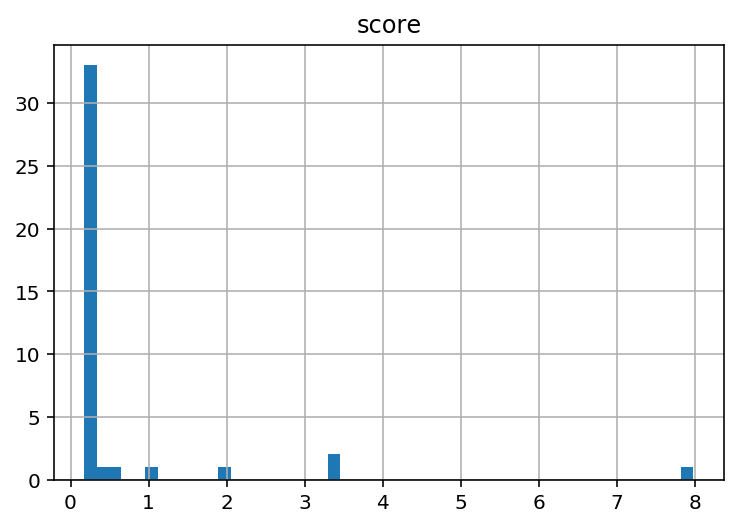

In [19]:
pd.DataFrame.hist(data=df, column='score',bins=50)

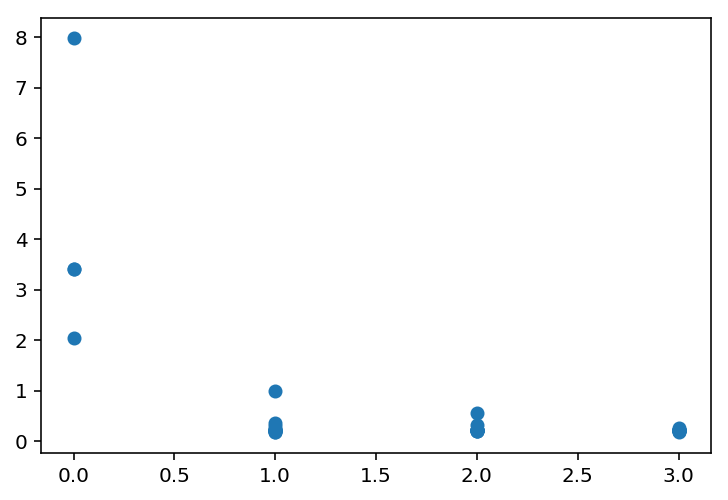

In [20]:
plt.scatter(x=df.num_hidden_layers, y=df.score)

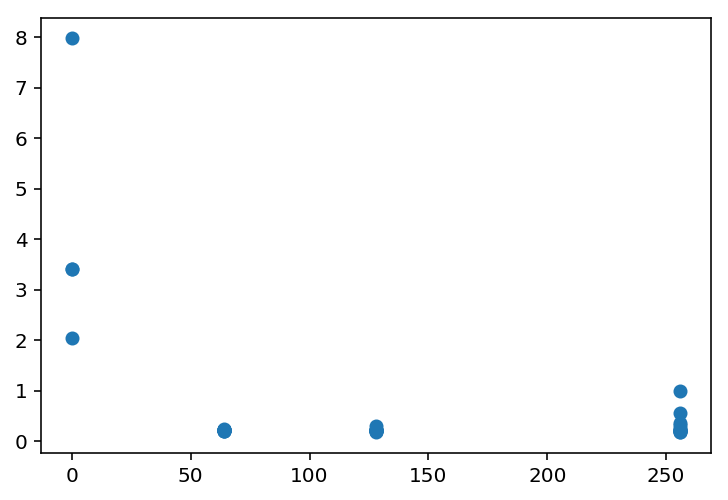

In [21]:
plt.scatter(x=df.hidden_layer_size, y=df.score)

In [22]:
df.head()

,param_num_hidden_layers,param_hidden_layer_size,param_activation_function,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,...,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,score,num_hidden_layers,hidden_layer_size,activation_function
0,0,0,linear,18.877625,1.608140,0.138699,0.025194,-2.373923,-2.081822,-1.334480,...,-1.837597,-1.176133,-3.024336,-1.095315,-1.887882,0.721616,2.044422,0,0,linear
1,0,0,relu,13.943288,0.287599,0.295754,0.018892,-7.876654,-8.002765,-7.793879,...,-7.970431,-8.022614,-7.943718,-7.945698,-7.976898,0.031105,7.976894,0,0,relu
2,0,0,sigmoid,12.494315,0.124183,0.203067,0.020734,-3.334007,-3.429019,-3.289454,...,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881,3.408203,0,0,sigmoid
3,0,0,tanh,12.805012,0.312548,0.343594,0.019401,-3.334007,-3.429019,-3.289454,...,-3.403003,-3.437868,-3.386606,-3.386745,-3.408206,0.020881,3.408203,0,0,tanh
4,1,64,linear,245.377212,47.310742,0.487355,0.024138,-0.179391,-0.311087,-0.196488,...,-0.124082,-0.039679,-0.014129,-0.048821,-0.050033,0.038955,0.222170,1,64,linear


In [23]:
activation_dummies = pd.get_dummies(df.activation_function)

In [24]:
df['layers_and_size_interaction'] = df.num_hidden_layers + df.hidden_layer_size

In [25]:
df = pd.concat([df,activation_dummies],axis=1)

In [26]:
df.columns

Index(['param_num_hidden_layers', 'param_hidden_layer_size',
       'param_activation_function', 'mean_fit_time', 'std_fit_time',
       'mean_score_time', 'std_score_time', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score', 'score', 'num_hidden_layers',
       'hidden_layer_size', 'activation_function',
       'layers_and_size_interaction', 'linear', 'relu', 'sigmoid', 'tanh'],
      dtype='object')

Basic OLS model:

In [27]:
model1 = smf.ols(formula='score ~ num_hidden_layers + hidden_layer_size\
                + relu + sigmoid + tanh', data=df)

results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.240
Date:                Tue, 06 Nov 2018   Prob (F-statistic):            0.00420
Time:                        14:35:30   Log-Likelihood:                -60.205
No. Observations:                  40   AIC:                             132.4
Df Residuals:                      34   BIC:                             142.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.1931      0.54

OLS model with interaction between layer number and size:

In [28]:
model2 = smf.ols(formula='score ~ num_hidden_layers + hidden_layer_size + layers_and_size_interaction \
                + relu + sigmoid + tanh', data=df)

results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     4.240
Date:                Tue, 06 Nov 2018   Prob (F-statistic):            0.00420
Time:                        14:35:34   Log-Likelihood:                -60.205
No. Observations:                  40   AIC:                             132.4
Df Residuals:                      34   BIC:                             142.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

None of the coefficients are significant, making it difficult to interpret the results of the model. Overall it appears that all of the activation functions have a stronger negative effect on mean squared error (thus improving the predictions) than the reference category, the linear activation function. The number of hidden layers and the interaction between this and the hidden layer size (the number of neurons in the layer) are both also negative, which hidden layer size alone is positive.

An issue with the current data is that the outliers with extremely high MSE, where the model was never able to converge towards sensible predictions, may be biasing the results. To assess whether this is the case I can re-run the models excluding these outliers.

In [29]:
df_ = df[df['score'] <= 1.0]

In [30]:
df_.shape

(36, 31)

Basic model without outliers:

In [31]:
model3 = smf.ols(formula='score ~ num_hidden_layers + hidden_layer_size \
                + relu + sigmoid + tanh', data=df_)

results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.718
Date:                Tue, 06 Nov 2018   Prob (F-statistic):              0.161
Time:                        14:35:46   Log-Likelihood:                 24.291
No. Observations:                  36   AIC:                            -36.58
Df Residuals:                      30   BIC:                            -27.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2789      0.08

Including interactions:

In [32]:
model4 = smf.ols(formula='score ~ num_hidden_layers + hidden_layer_size + layers_and_size_interaction \
                + relu + sigmoid + tanh', data=df_)

results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.718
Date:                Tue, 06 Nov 2018   Prob (F-statistic):              0.161
Time:                        14:35:50   Log-Likelihood:                 24.291
No. Observations:                  36   AIC:                            -36.58
Df Residuals:                      30   BIC:                            -27.08
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Here we see that the overall model fit has improved, with the R-squared value increasing from 0.079 to 0.374. The coefficient for the ReLU activation is also positive now, consistent with the observation that its performance tends to fluctuate more than the other functions.

Overall these results show that there are no clear, statistically significant, effects of basic architecture on model performance. Nonetheless the observed differences in the results elsewhere provide some evidence that models with more layers and node and non-linear activation are better able to generalize to out-of-sample data. The small number of observations may also be preventing us from seeing statistically significant relationships. Future work should assess the performance of models over a greater range of architectures to better assess how these choices affect predictive performance.

In [33]:
info = {'N': lambda x: str(int(x.nobs)),
        'R2': lambda x: '%.3f' % x.rsquared,
        'R2-adj': lambda x: '%.3f' % x.rsquared_adj,
        'F': lambda x: '%.3f' % x.fvalue} 

tbl = summary_col([results1, results2, results3, results4],
                  model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4'],
                  info_dict =  info,
                  stars=True, 
                  float_format='%0.4f',
                  regressor_order=['num_hidden_layers', 'hidden_layer_size', 'layer_and_size_interaction',
                                  'relu', 'sigmoid', 'tanh', 'Intercept'])

In [34]:
tbl # Order is incorrect here even though specified above. Manually changed for paper.

,Model 1,Model 2,Model 3,Model 4
num_hidden_layers,-0.6496***,-0.4317***,-0.0399,-0.0268
,(0.2008),(0.1341),(0.0276),(0.0184)
hidden_layer_size,-0.0042*,0.2138***,0.0006**,0.0137
,(0.0022),(0.0674),(0.0003),(0.0092)
relu,0.5912,0.5912,-0.0022,-0.0022
,(0.5287),(0.5287),(0.0636),(0.0636)
sigmoid,0.0697,0.0697,-0.0741,-0.0741
,(0.5287),(0.5287),(0.0636),(0.0636)
tanh,0.0880,0.0880,-0.0538,-0.0538
,(0.5287),(0.5287),(0.0636),(0.0636)
